# Implementing Logistic Regression From Scratch 

In [154]:
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
from sklearn import datasets



In [155]:
data = datasets.load_breast_cancer()
x , y = pd.DataFrame(data.data) , pd.DataFrame(data.target)
print(x.head()) # checking our input data  ( it has 569 data on each feature )
print(x[0][568])


      0      1       2       3        4        5       6        7       8   \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

        9   ...     20     21      22      23      24      25      26      27  \
0  0.07871  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.05667  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.05999  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.09744  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.05883  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       28       29  
0  0.4601  0.11890  
1 

### Making all of the parameters 

In [156]:
w = np.zeros(30)
w.fill(200) # set all of the values of w 
b = 200 # value of b
alpha = 0.01


In [157]:
def sigmoid_calc(xi, w , b):
    value = 1/(1 + np.exp( -(np.dot(w,xi)+b) ) ) ;
    return value


def gradDesJw(m = len(x) , w = w , b = b , x = x , y = y):
    Jw = np.zeros(30)
    for feature in range(len(w)):
        for i in range(len(x)):
            Jw[feature] += (sigmoid_calc(x.iloc[i],w,b) - y.iloc[i]) * x[feature][i]

    return Jw/m;

def gradDesJb(m = len(x) , w = w , b = b , x = x , y = y):
    Jb = 0
    for i in range(len(x)):
        Jb += (sigmoid_calc(x.iloc[i],w,b) - y.iloc[i])

    return Jb/m;

print(len(x.iloc[0]))
print(y.iloc[120])


30
0    1
Name: 120, dtype: int64


In [158]:
# it's telling some are deprecated features look into it in detail later now it works fine 
t = 50
while(t >= 0):
    w_des = alpha * gradDesJw()
    b_des = alpha * gradDesJb()
    w = w - w_des
    b = b - b_des

    t = t-1
    



/var/folders/gh/01q9wrls05gc9n_xlqkhf6h40000gn/T/ipykernel_4559/618920957.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Jw[feature] += (sigmoid_calc(x.iloc[i],w,b) - y.iloc[i]) * x[feature][i]


In [159]:
print(w , b)

[196.68175536 195.89468822 178.07855079  14.09128647 199.98044748
 199.97241177 199.96944998 199.98328035 199.96334391 199.98808968
 199.88426361 199.76990494 199.17837745 186.19096573 199.99871166
 199.99386601 199.9920527  199.99713825 199.99610988 199.99922807
 195.98401441 194.42902531 173.13715272 -70.25939719 199.97247686
 199.92877683 199.91437702 199.96537171 199.93853541 199.9826077 ] 0    199.809982
Name: 0, dtype: float64


199.80998242530686
1
80
[0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1.

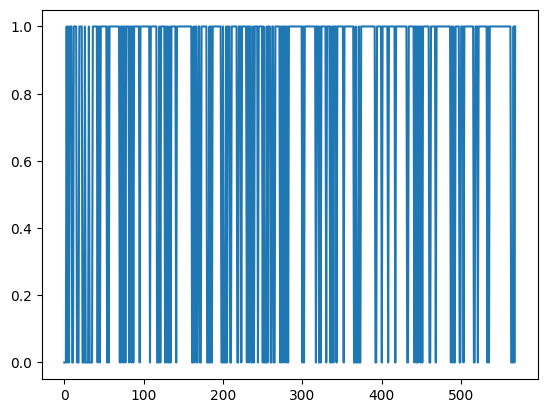

In [160]:
y_pred = np.zeros(569)
print(b[0])
print(y[0][120])
count = 0
for i in range(569):
    if( (np.dot(x.iloc[i],w) + b[0])  >=  0):
        y_pred[i] = 1
        if((y_pred[i] - y[0][i]) != 0):
            count = count + 1
    else:
        y_pred[i] = 0
        if((y_pred[i] - y[0][i]) != 0):
            count = count + 1



print(count)
print(y_pred)

plt.plot(y_pred)
plt.show()





/var/folders/gh/01q9wrls05gc9n_xlqkhf6h40000gn/T/ipykernel_4559/2035525307.py:18: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-(np.dot(w, xi) + b)))


Misclassified examples: 47
Accuracy: 91.73989455184535 %


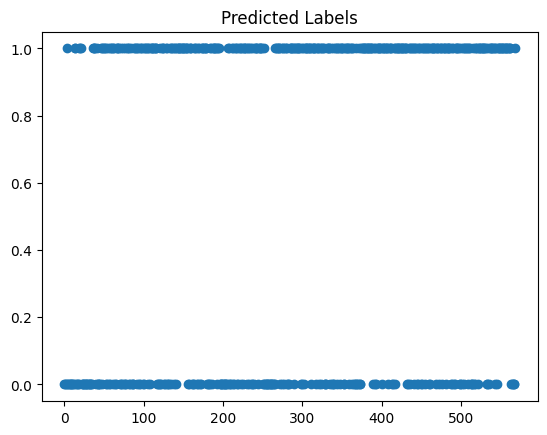

[ 6.56492794e+00 -3.91730714e+00  2.91411099e+01  5.02373148e+00
 -5.54381952e-03 -2.98549337e-01 -4.96469922e-01 -1.94793820e-01
 -4.38825578e-03  1.63962544e-02  6.62448026e-02 -1.23523725e-01
 -1.21754706e+00 -1.27821212e+01 -5.66041231e-03 -7.94061048e-02
 -1.10979173e-01 -2.45464128e-02 -1.40707781e-02 -5.84037999e-03
  6.97730788e+00 -1.02658905e+01  1.99314466e+01 -9.30557851e+00
 -5.26424825e-02 -1.07300340e+00 -1.42462109e+00 -3.64812177e-01
 -1.73183535e-01 -6.19254017e-02]


In [162]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Load and preprocess data
data = datasets.load_breast_cancer()
x = data.data   # shape: (569, 30)
y = data.target # shape: (569,)

# Parameters
w = np.zeros(30)
w.fill(0)
b = 0
alpha = 0.01

# Sigmoid function
def sigmoid_calc(xi, w, b):
    return 1 / (1 + np.exp(-(np.dot(w, xi) + b)))

# Gradient with respect to weights
def gradDesJw(x, y, w, b):
    m = len(x)
    Jw = np.zeros_like(w)
    for i in range(m):
        pred = sigmoid_calc(x[i], w, b)
        Jw += (pred - y[i]) * x[i]
    return Jw / m

# Gradient with respect to bias
def gradDesJb(x, y, w, b):
    m = len(x)
    Jb = 0
    for i in range(m):
        pred = sigmoid_calc(x[i], w, b)
        Jb += (pred - y[i])
    return Jb / m

# Training
t = 10000
losses = []
while t >= 0:
    w_des = alpha * gradDesJw(x, y, w, b)
    b_des = alpha * gradDesJb(x, y, w, b)
    w -= w_des
    b -= b_des
    t -= 1

# Predict
y_pred = np.zeros(len(x))
count = 0
for i in range(len(x)):
    prob = sigmoid_calc(x[i], w, b)
    y_pred[i] = 1 if prob >= 0.5 else 0
    if y_pred[i] != y[i]:
        count += 1

print("Misclassified examples:", count)
print("Accuracy:", (1 - count / len(x)) * 100, "%")

# Plot predictions
plt.plot(y_pred,'o')
plt.title("Predicted Labels")
plt.show()
print(w)


# write whole code again with high performance 